In [1]:
from load_data import load
import numpy as np
import np_utils as np_u
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
(train_data, train_labels, test_data, test_labels) = load()

In [4]:
train_data.shape

(50000, 32, 32, 3)

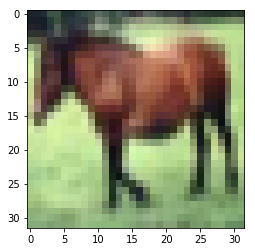

In [5]:
plt.imshow(train_data[7])

In [6]:
model = Sequential()
model.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(32,32,3)))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())

In [7]:
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0

In [9]:
train_s_data = train_data[0:39999]
train_s_labels = train_labels[0:39999]
valid_data = train_data[40000:49999]
valid_labels = train_labels[40000:49999]

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
datagen.fit(train_data)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
sm_cb = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='../checkpoints/best_with_datagen.hdf5', verbose=1, save_best_only=True)
history = model.fit_generator(datagen.flow(train_s_data, train_s_labels), steps_per_epoch=1250, verbose=2, epochs=200, shuffle=True, validation_data=(valid_data, valid_labels), callbacks=[es_cb, sm_cb])

Epoch 1/200

Epoch 00001: val_loss improved from inf to 11.87504, saving model to ../checkpoints/best_with_datagen.hdf5
1250/1250 - 93s - loss: 1.6258 - accuracy: 0.4270 - val_loss: 11.8750 - val_accuracy: 0.2495
Epoch 2/200

Epoch 00002: val_loss improved from 11.87504 to 8.47963, saving model to ../checkpoints/best_with_datagen.hdf5
1250/1250 - 92s - loss: 1.2419 - accuracy: 0.5595 - val_loss: 8.4796 - val_accuracy: 0.4164
Epoch 3/200

Epoch 00003: val_loss did not improve from 8.47963
1250/1250 - 92s - loss: 1.0974 - accuracy: 0.6145 - val_loss: 10.2599 - val_accuracy: 0.3364
Epoch 4/200

Epoch 00004: val_loss did not improve from 8.47963
1250/1250 - 92s - loss: 1.0013 - accuracy: 0.6477 - val_loss: 9.6701 - val_accuracy: 0.3638
Epoch 5/200

Epoch 00005: val_loss did not improve from 8.47963
1250/1250 - 91s - loss: 0.9317 - accuracy: 0.6752 - val_loss: 9.0806 - val_accuracy: 0.3863
Epoch 6/200

Epoch 00006: val_loss did not improve from 8.47963
1250/1250 - 91s - loss: 0.8807 - accur

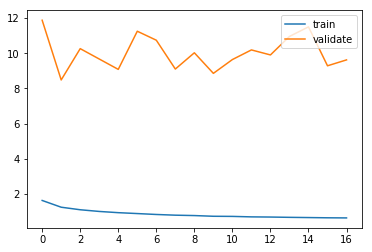

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')

In [13]:
test_labels = np.array(test_labels, dtype='uint8')
model.load_weights('../checkpoints/best_with_datagen.hdf5')
model.evaluate(test_data, test_labels, verbose=0)

[26.663723718261718, 0.4197]